## This assignment is designed for automated pathology detection for Medical Images in a realistic setup, i.e. each image may have multiple pathologies/disorders. 
### The goal, for you as an MLE, is to design models and methods to predictively detect pathological images and explain the pathology sites in the image data.

## Data for this assignment is taken from a Kaggle contest: https://www.kaggle.com/c/vietai-advance-course-retinal-disease-detection/overview
Explanation of the data set:
The training data set contains 3435 retinal images that represent multiple pathological disorders. The patholgy classes and corresponding labels are: included in 'train.csv' file and each image can have more than one class category (multiple pathologies).
The labels for each image are

```
-opacity (0), 
-diabetic retinopathy (1), 
-glaucoma (2),
-macular edema (3),
-macular degeneration (4),
-retinal vascular occlusion (5)
-normal (6)
```
The test data set contains 350 unlabelled images.

# For this assignment, you are working with specialists for Diabetic Retinopathy and Glaucoma only, and your client is interested in a predictive learning model along with feature explanability and self-learning for Diabetic Retinopathy and Glaucoma vs. Normal images.
# Design models and methods for the following tasks. Each task should be accompanied by code, plots/images (if applicable), tables (if applicable) and text:
## Task 1: Build a classification model for Diabetic Retinopathy and Glaucoma vs normal images. You may consider multi-class classification vs. all-vs-one classification. Clearly state your choice and share details of your model, parameters and hyper-paramaterization process. (60 points)
```
a. Perform 70/30 data split and report performance scores on the test data set.
b. You can choose to apply any data augmentation strategy. 
Explain your methods and rationale behind parameter selection.
c. Show Training-validation curves to ensure overfitting and underfitting is avoided.
```
## Task 2: Visualize the heatmap/saliency/features using any method of your choice to demonstrate what regions of interest contribute to Diabetic Retinopathy and Glaucoma, respectively. (25 points)
```
Submit images/folder of images with heatmaps/features aligned on top of the images, or corresponding bounding boxes, and report what regions of interest in your opinion represent the pathological sites.
```

## Task 3: Using the unlabelled data set in the 'test' folder augment the training data (semi-supervised learning) and report the variation in classification performance on test data set.(15 points)
[You may use any method of your choice, one possible way is mentioned below.] 

```
Hint: 
a. Train a model using the 'train' split.
b. Pass the unlabelled images through the trained model and retrieve the dense layer feature prior to classification layer. Using this dense layer as representative of the image, apply label propagation to retrieve labels correspndng to the unbalelled data.
c. Next, concatenate the train data with the unlabelled data (that has now been self labelled) and retrain the network.
d. Report classification performance on test data
Use the unlabelled test data  to improve classification performance by using a semi-supervised label-propagation/self-labelling approach. (20 points)
```
## Good Luck!

In [1]:
# Clean and reset data to original for 
# re-running the notebook from the start

import os
import shutil
path = './Data/train/validation'
files = os.listdir('./Data/train/validation')
for file in files:
    file = os.path.join(path, file)
    shutil.move(file, './Data/train/train')

## Task 1

In [2]:
import numpy as np

In [3]:
import pandas as pd

# bring in training csv
train_csv = pd.read_csv('./Data/train/train.csv')
train_csv.head()

,filename,opacity,diabetic retinopathy,glaucoma,macular edema,macular degeneration,retinal vascular occlusion,normal
0,c24a1b14d253.jpg,0,0,0,0,0,1,0
1,9ee905a41651.jpg,0,0,0,0,0,1,0
2,3f58d128caf6.jpg,0,0,1,0,0,0,0
3,4ce6599e7b20.jpg,1,0,0,0,1,0,0
4,0def470360e4.jpg,1,0,0,0,1,0,0


In [4]:
train_csv.shape

(3435, 8)

In [5]:
# Drop columns we aren't using
train_csv = train_csv.drop(labels=['opacity', 'macular edema',
                                   'macular degeneration',
                                   'retinal vascular occlusion'],
                           axis='columns')
train_csv.shape

(3435, 4)

In [6]:
train_csv.head()

,filename,diabetic retinopathy,glaucoma,normal
0,c24a1b14d253.jpg,0,0,0
1,9ee905a41651.jpg,0,0,0
2,3f58d128caf6.jpg,0,1,0
3,4ce6599e7b20.jpg,0,0,0
4,0def470360e4.jpg,0,0,0


In [7]:
# !!!!! TODO: Determine what to do with images that belong to no category
conditions = [
    (train_csv['diabetic retinopathy'] == 1),
    (train_csv['diabetic retinopathy'] == 1),
    (train_csv['diabetic retinopathy'] == 1),
    (train_csv['diabetic retinopathy'] == 0) 
    & (train_csv['glaucoma'] == 0)
    & (train_csv['normal'] == 0),
]
values = [0, 0, 0, 1]
train_csv['other'] = np.select(conditions, values)
train_csv.head()

,filename,diabetic retinopathy,glaucoma,normal,other
0,c24a1b14d253.jpg,0,0,0,1
1,9ee905a41651.jpg,0,0,0,1
2,3f58d128caf6.jpg,0,1,0,0
3,4ce6599e7b20.jpg,0,0,0,1
4,0def470360e4.jpg,0,0,0,1


In [8]:
train_path = './Data/train/train/'
other_path = './Data/train/train/Other'
other_indices = []
for index, row in train_csv.iterrows():
    if row['other'] == 1:
        other_indices.append(index)
        file = os.path.join(train_path+row['filename'])
        shutil.move(file, other_path)
train_csv = train_csv.drop(index=other_indices)
train_csv.head()

,filename,diabetic retinopathy,glaucoma,normal,other
2,3f58d128caf6.jpg,0,1,0,0
18,10ee8c8a72b4.jpg,1,0,0,0
19,3b6da0297f92.jpg,1,0,0,0
20,677c30357c4e.jpg,1,0,0,0
23,90ff4cbcdc9b.jpg,1,0,0,0


In [9]:
train_csv.shape

(1858, 5)

In [10]:
train_csv = train_csv.drop(columns='other', axis=1)

In [11]:
train_csv.shape

(1858, 4)

In [12]:
# Shuffle the data
train_csv = train_csv.sample(frac=1)
print(train_csv.shape)

(1858, 4)


In [13]:
# Graphs and data exploration

In [14]:
train_csv.describe()

,diabetic retinopathy,glaucoma,normal
count,1858.000000,1858.000000,1858.000000
mean,0.406351,0.321313,0.282562
std,0.491284,0.467106,0.450366
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'diabetic retinopathy'}>,
        <AxesSubplot:title={'center':'glaucoma'}>],
       [<AxesSubplot:title={'center':'normal'}>, <AxesSubplot:>]],
      dtype=object)

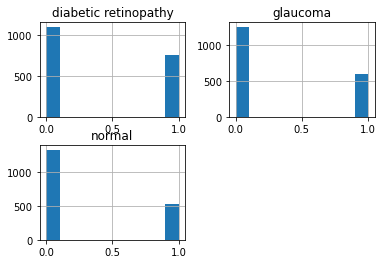

In [15]:
train_csv.hist()

In [16]:
import math
test_portion = math.floor(.3 * train_csv.shape[0])

In [17]:
test_csv = train_csv[0:test_portion]
test_csv.shape

(557, 4)

In [18]:
test_csv.head()

,filename,diabetic retinopathy,glaucoma,normal
2477,a610568289dc.jpg,1,0,0
638,bfc3bb24c630.jpg,0,1,0
36,f296dbe7fd0a.jpg,1,0,0
3231,2eeb0c7908c5.jpg,0,0,1
2849,02bff9fd3750.jpg,1,0,0


In [19]:
train_csv = train_csv[test_portion:]
train_csv.shape

(1301, 4)

In [20]:
import os
files = os.listdir('./Data/train/train/')
print(len(files))

1860


In [21]:
validation_images = test_csv['filename']
for file in validation_images:
    file = os.path.join('./Data/train/train', file)
    #print(file)
    shutil.move(file, '/home/sarah/FourthBrain/Midterm/Data/train/validation')

In [22]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras import backend as keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import scipy.misc as sc

In [23]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0.2,
                                                 width_shift_range=0.05,
                                                 height_shift_range=0.05,
                                                 zoom_range=[0.7,1],
                                                 horizontal_flip=True,
                                                 vertical_flip=True)

In [24]:
# taken from Week 7 assignment
def dice_coef(y_true, y_pred, smooth=1):
    intersection = keras.sum(y_true * y_pred, axis=[1,2,3])
    union = keras.sum(y_true, axis=[1,2,3]) + keras.sum(y_pred, axis=[1,2,3])
    return keras.mean( (2. * intersection + smooth) / (union + smooth), axis=0)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

In [25]:
# VGG 16
def vgg16(pretrained_weights=None, input_size=(224, 224, 3)):
    inputs = tf.keras.Input(shape=input_size)
    x = Conv2D(64, 3, activation='relu', padding='same')(inputs)
    x = Conv2D(64, 3, activation='relu', padding='same')(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = Conv2D(128, 3, activation='relu', padding='same')(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = Conv2D(256, 3, activation='relu', padding='same')(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 1, activation='relu', padding='same')(x)
    x = MaxPool2D()(x)
    
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 3, activation='relu', padding='same')(x)
    x = Conv2D(512, 1, activation='relu', padding='same')(x)
    x = MaxPool2D()(x)
    
    flat = Flatten()(x)
    dense = Dense(1*1*512, activation='relu')(flat)
    dropout = Dropout(0.5)(dense)
    
    dense_last = Dense(4096, activation='relu')(dense)
    #dropout = Dropout(0.5)(dense)
    
    soft = Dense(4, activation='softmax')(dense_last)
    
    #soft = Softmax()(dense_last)
    
    model = tf.keras.Model(inputs=inputs, outputs=soft)
    
    model.compile(optimizer=Adam(lr=1e-6), loss='categorical_crossentropy', metrics='accuracy')
    
    if (pretrained_weights):
        model=keras.models.load_model(pretrained_weights)
    
    return model
    

In [26]:
model = vgg16()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0     

In [27]:
import datetime
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [28]:
#columns = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
columns = ['diabetic retinopathy', 'glaucoma', 'normal']
train_gen = datagen.flow_from_dataframe(directory = './Data/train/train',
                                        dataframe = train_csv,
                                        x_col = 'filename',
                                        y_col = columns,
                                        target_size=(224,224),
                                        batch_size=15,
                                        rescale=1./255,
                                        class_mode='other',
                                       )

Found 1301 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.9/logging/__init__.py", line 1079, in emit
    msg = self.format(record)
  File "/usr/lib/python3.9/logging/__init__.py", line 923, in format
    return fmt.format(record)
  File "/usr/lib/python3.9/logging/__init__.py", line 659, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.9/logging/__init__.py", line 363, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/lib/py

In [29]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0,
                                                 width_shift_range=0.0,
                                                 height_shift_range=0.0,
                                                 horizontal_flip=False,
                                                 vertical_flip=False)
#columns = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
columns = ['diabetic retinopathy', 'glaucoma', 'normal']
test_gen = datagen.flow_from_dataframe(directory = './Data/train/validation/',
                                        dataframe = test_csv,
                                        x_col = 'filename',
                                        y_col = columns,
                                        target_size=(224,224),
                                        batch_size=10,
                                        rescale=1./255,
                                        class_mode='other',
                                       )

Found 557 validated image filenames.


--- Logging error ---
Traceback (most recent call last):
  File "/usr/lib/python3.9/logging/__init__.py", line 1079, in emit
    msg = self.format(record)
  File "/usr/lib/python3.9/logging/__init__.py", line 923, in format
    return fmt.format(record)
  File "/usr/lib/python3.9/logging/__init__.py", line 659, in format
    record.message = record.getMessage()
  File "/usr/lib/python3.9/logging/__init__.py", line 363, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Call stack:
  File "/usr/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.9/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.9/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/usr/lib/py

In [30]:
import time
now = str(time.time())
checkpoint = now + 'vgg16.hdf5'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint, monitor='loss',verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=1, mode='auto')
fitting = model.fit_generator(train_gen,
                    steps_per_epoch=100,
                    epochs=100,
                    verbose=1, 
                    validation_data=test_gen,
                    validation_steps = 10,
                    callbacks=[tensorboard_callback, model_checkpoint, early_stopping])

/usr/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100


InvalidArgumentError:  logits and labels must be broadcastable: logits_size=[15,4] labels_size=[15,3]
	 [[node categorical_crossentropy/softmax_cross_entropy_with_logits (defined at <ipython-input-30-4bf58f0801ec>:6) ]] [Op:__inference_train_function_1770]

Function call stack:
train_function


In [ ]:
import matplotlib.pyplot as plt

plt.plot(fitting.history['accuracy'])
plt.plot(fitting.history['val_accuracy'])
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Accuracy', 'Validation Accuracy', 'Loss', 'Validation Loss'])
plt.show()

In [ ]:
#%tensorboard --logdir logs/fit

In [ ]:
print(datagen)

In [ ]:
Y_pred = model.predict(test_gen)

In [ ]:
test_csv.head()

In [ ]:
def class_to_number(df):
    numbers = []
    for index, row in df.iterrows():
        if row['diabetic retinopathy'] ==1:
            numbers.append(0)
        elif row['glaucoma'] == 1:
            numbers.append(1)
        elif row['normal'] == 1:
            numbers.append(2)
        elif row['other'] == 1:
            numbers.append(3)
        else:
            print('PROBLEM')
    return numbers

In [ ]:
y_true_val = class_to_number(test_csv)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
target_names = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
print(confusion_matrix(y_true_val, y_pred))

## Task 2

This task was heavily influenced by an example from the library [tf-keras-vis](https://github.com/keisen/tf-keras-vis/blob/master/examples/attentions.ipynb).  

In [ ]:
# keras-vis
import tf_keras_vis

In [ ]:
test_csv[0:20]

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

stuff = ['883d583c0f29.jpg', 'e8f1075cd1e3.jpg', '7fbdc707365e.jpg']
titles = ['diabetic retinopathy', 'glaucoma', 'normal']
path = '/home/sarah/FourthBrain/Midterm/Data/train/validation/'

img1 = load_img(path+stuff[0], target_size=(224,224))
img2 = load_img(path+stuff[1], target_size=(224,224))
img3 = load_img(path+stuff[2], target_size=(224,224))
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

X = preprocess_input(images)

subplot_args = {'nrows': 1,
               'ncols': 3,
               'figsize': (9,3),
               }
f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

In [ ]:
# Vanilla Saliency

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

# Output of model
def loss(output):
    return (output[0][1], output[1][2], output[2][3])

saliency = Saliency(model,
                   model_modifier=model_modifier,
                   clone=False)

saliency_map = saliency(loss, X)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

In [ ]:
# Smooth Grad

saliency_map = saliency(loss,
                       X,
                       smooth_samples=20,
                       smooth_noise=0.20)
saliency_map = normalize(saliency_map)

f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

In [ ]:
# Grad Cam

from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

gradcam = Gradcam(model,
                 model_modifier=model_modifier,
                 clone=False)
cam = gradcam(loss,
             X,
             penultimate_layer=-1)
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(images[i])
plt.tight_layout()
plt.show()

f, ax = plt.subplots(**subplot_args)
for i in range(3):
    ax[i].set_title(titles[i], fontsize=14)
    ax[i].imshow(images[i])
    ax[i].imshow(saliency_map[i], cmap='jet')
plt.tight_layout()
plt.show()

My model is not really well trained enough to get good answers for being able to understand the features the model is focusing on to make the classification of retinal images, however, based on the images and saliency maps I was able to create, I will try to make some observations.  
In diabetic retinopathy the attention of the model seems to be focused on the brighter flashy spots on the image.  
For glaucoma, the attention seems to be focused on the area immediately surrounding the optic disk, but not the disk itself.  
In normal retinal images, the attention seems to be on the edges and completely ignoring the macula and the optic disk.

## Task 3

Hint:   
a. Train a model using the 'train' split.  
b. Pass the unlabelled images through the trained model and retrieve the dense layer feature prior to classification layer. Using this dense layer as representative of the image, apply label propagation to retrieve labels correspondng to the unbalelled data.  
c. Next, concatenate the train data with the unlabelled data (that has now been self labelled) and retrain the network.  
d. Report classification performance on test data  
Use the unlabelled test data  to improve classification performance by using a semi-supervised label-propagation/self-labelling approach. (20 points)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=0,
                                                 width_shift_range=0.0,
                                                 height_shift_range=0.0,
                                                 horizontal_flip=False,
                                                 vertical_flip=False)
columns = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
unlabeled_gen = datagen.flow_from_directory(directory = './Data/test/', target_size=(224,224))

In [ ]:
for layer in model.layers:
    print(layer.name)

In [ ]:
layer_name = 'dense_1'
intermediate_model = Model(inputs=model.input,
                           outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_model.predict(unlabeled_gen)

In [ ]:
print(intermediate_output[0].shape)

In [ ]:
def classification_head(input_size=(4096,)):
    inputs = tf.keras.Input(shape=input_size)
    soft = Dense(4, activation='softmax')(inputs)
    model = tf.keras.Model(inputs=inputs, outputs=soft)
    model.compile(optimizer=Adam(lr=1e-4), loss='categorical_crossentropy', metrics='accuracy')
    return model

In [ ]:
classificationHead = classification_head()
classificationHead.summary()

In [ ]:
pseudo_probabilities = classificationHead.predict(intermediate_output)

In [ ]:
#unlabeled_gen
#
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, verbose=0)

In [ ]:
pseudo_labels = kmeans.fit_predict(pseudo_probabilities)

In [ ]:
print(pseudo_labels.shape)

In [ ]:
print(pseudo_labels[0])

In [ ]:
print(pseudo_labels)

In [ ]:
def number_to_class(labels, images):
    images = images
    dr = []
    glaucoma = []
    normal = []
    other = []
    for number in labels:
        if number == 0:
            dr.append(1)
            glaucoma.append(0)
            normal.append(0)
            other.append(0)
        elif number == 1:
            dr.append(0)
            glaucoma.append(1)
            normal.append(0)
            other.append(0)
        elif number == 2:
            dr.append(0)
            glaucoma.append(0)
            normal.append(1)
            other.append(0)
        elif number == 3:
            dr.append(0)
            glaucoma.append(0)
            normal.append(0)
            other.append(1)
    df = pd.DataFrame(data={'filename': images,
                            'diabetic retinopath': dr,
                            'glaucoma': glaucoma,
                            'normal': normal,
                            'other': other})
    return df

In [ ]:
images = os.listdir('/home/sarah/FourthBrain/Midterm/Data/test/test')
print(len(images))
print(type(images))

In [ ]:
pseudo_labels2 = []
for number in pseudo_labels:
    pseudo_labels2.append(number)

In [ ]:
print(len(pseudo_labels2))
print(type(pseudo_labels2))

In [ ]:
new_df = number_to_class(pseudo_labels2, images)

In [ ]:
labeled_and_unlabeled = pd.concat([train_csv, new_df])
labeled_and_unlabeled.shape

In [ ]:
files1 = os.listdir('/home/sarah/FourthBrain/Midterm/Data/train/train/')
path1 = '/home/sarah/FourthBrain/Midterm/Data/train/train/'
files2 = os.listdir('/home/sarah/FourthBrain/Midterm/Data/test/test/')
path2 = '/home/sarah/FourthBrain/Midterm/Data/test/test/'
dest = '/home/sarah/FourthBrain/Midterm/Data/combined/'

for file in files1:
    if file.endswith('.jpg'):
        shutil.copy2(path1+file, dest)
for file in files2:
    if file.endswith('.jpg'):
        shutil.copy2(path2+file, dest)

In [ ]:
columns = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
labels_gen = datagen.flow_from_dataframe(directory = './Data/combined',
                                        dataframe = labeled_and_unlabeled,
                                        x_col = 'filename',
                                        y_col = columns,
                                        target_size=(224,224),
                                        batch_size=15,
                                        rescale=1./255,
                                        class_mode='other',
                                       )

In [ ]:
fitting2 = model.fit_generator(labels_gen,
                    steps_per_epoch=100,
                    epochs=100,
                    verbose=1, 
                    validation_data=test_gen,
                    validation_steps = 10,
                    callbacks=[model_checkpoint, early_stopping])

In [ ]:
Y_pred = model.predict(test_gen)
y_true_val = class_to_number(test_csv)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
target_names = ['diabetic retinopathy', 'glaucoma', 'normal', 'other']
print(confusion_matrix(y_true_val, y_pred))

In [ ]:
Y_pred

Based on the fact that my 'improved' training run can now only predict one class, I'm guessing I did something wrong with the self labeling to make the network considerably worse than my already bad original model.